<a href="https://colab.research.google.com/github/sahilfaizal01/NeuroInformatics-Project/blob/main/PCA_Dimensionality_Reduction_Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [22]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [2]:
C_df = pd.read_csv('/content/cn-C-array.csv',header=None)
C_df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.001439,0.005755,0.026316,0.004065,0.014925,0.009174,0.000000,0.241935,0.913669,0.900719,...,0.0,0.0,0.0,0.477698,0.001439,0.001439,0.002878,0.006878,0.002825,0.000000
1,0.000000,0.000000,0.973684,0.000000,0.000000,0.000000,0.000000,0.000000,0.081769,0.956349,...,0.0,0.0,0.0,0.953083,0.009383,0.628922,0.001340,0.930295,0.000000,0.001773
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184211,0.973684,...,0.0,0.0,0.0,0.157895,0.473684,0.000000,0.973684,0.210526,0.552632,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.004065,0.000000,0.000000,0.000000,0.646341,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.205128,0.016129,0.014925,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000


In [3]:
G_df = pd.read_csv('/content/RNA_mean_part.csv')
G_df.head()

,Unnamed: 0,C2,C3,Dm1,Dm10,Dm11,Dm12,Dm4,Dm9,L1,...,T5b,T5c,T5d,Tm1,Tm2,Tm20,Tm3,Tm4,TmY3,TmY5a
0,Nep3,0.135671,0.178622,0.476190,0.205489,0.273713,0.397906,0.283333,0.259843,0.146947,...,0.098475,0.098007,0.082068,0.152154,0.121829,0.160268,0.122828,0.170845,0.167037,0.193115
1,tRNA:Pro-CGG-1-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CG9570,0.000000,0.000000,0.007937,0.000000,0.000000,0.001745,0.000000,0.000000,0.000421,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000344
3,Or19b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000898,0.000000,0.000000,0.000300,0.000000,0.000000,0.000000
4,CG15322,0.025534,0.020241,0.023810,0.024766,0.018970,0.024433,0.008333,0.041995,0.027789,...,0.022222,0.022425,0.024194,0.018402,0.019600,0.016203,0.025464,0.023139,0.020533,0.023752


In [4]:
G_data = G_df.iloc[:,1:].values
G_data[:,0]

array([0.13567073, 0.        , 0.        , ..., 0.0003811 , 0.        ,
       0.01410061])

In [5]:
tags = G_df.iloc[:,0].values
Gi_tags = np.core.defchararray.add('Pre_G(i)_', tags.astype(str))
Gj_tags = np.core.defchararray.add('Post_G(j)_', tags.astype(str))

In [6]:
C_data = {}
for i in range(len(Gi_tags)):
  C_data[Gi_tags[i]] = []
  C_data[Gj_tags[i]] = []

In [7]:
C_DataFrame = pd.DataFrame(C_data)
C_DataFrame.head()

,Pre_G(i)_Nep3,Post_G(j)_Nep3,Pre_G(i)_tRNA:Pro-CGG-1-1,Post_G(j)_tRNA:Pro-CGG-1-1,Pre_G(i)_CG9570,Post_G(j)_CG9570,Pre_G(i)_Or19b,Post_G(j)_Or19b,Pre_G(i)_CG15322,Post_G(j)_CG15322,...,Pre_G(i)_dock,Post_G(j)_dock,Pre_G(i)_kraken,Post_G(j)_kraken,Pre_G(i)_CG13949,Post_G(j)_CG13949,Pre_G(i)_CG13950,Post_G(j)_CG13950,Pre_G(i)_ninaA,Post_G(j)_ninaA


In [8]:
len(list(C_data.keys()))

35122

In [9]:

# Sample C-matrix representing cell connections
C_matrix = C_df
# Sample G-matrix representing gene expression
G_matrix = G_data

# Initialize an empty list to store the extracted features and target
rows = []

# Iterate over the A-matrix to find cell connections and extract gene expression features
for i in range(len(C_matrix)):
    for j in range(len(C_matrix[i])):
        if i != j and C_matrix[i][j] > 0.1:
            # Extract gene expression features for connected cells
            features_i = pd.Series(G_matrix[:, i])
            features_j = pd.Series(G_matrix[:, j])
            # Add the features and connection status to the list
            new_row = {'connect': 1}
            for k, (feature_i, feature_j) in enumerate(zip(features_i, features_j), start=1):
                new_row[f'Pre_G(i)_{k}'] = feature_i
                new_row[f'Post_G(j)_{k}'] = feature_j
            # Append the new row to the list
            rows.append(new_row)
        elif i != j:
            features_i = pd.Series(G_matrix[:, i])
            features_j = pd.Series(G_matrix[:, j])
            # Add the features and connection status to the list for non-connected cells
            new_row = {'connect': 0}
            for k, (feature_i, feature_j) in enumerate(zip(features_i, features_j), start=1):
                new_row[f'Pre_G(i)_{k}'] = feature_i
                new_row[f'Post_G(j)_{k}'] = feature_j
            # Append the new row to the list
            rows.append(new_row)

# Create a DataFrame from the list of dictionaries
C_DataFrame = pd.DataFrame(rows)

# Print the DataFrame
print(C_DataFrame)

      connect  Pre_G(i)_1  Post_G(j)_1  Pre_G(i)_2  Post_G(j)_2  Pre_G(i)_3  \
0           0    0.135671     0.178622         0.0          0.0    0.000000   
1           0    0.135671     0.476190         0.0          0.0    0.000000   
2           0    0.135671     0.205489         0.0          0.0    0.000000   
3           0    0.135671     0.273713         0.0          0.0    0.000000   
4           0    0.135671     0.397906         0.0          0.0    0.000000   
...       ...         ...          ...         ...          ...         ...   
1477        0    0.193115     0.121829         0.0          0.0    0.000344   
1478        0    0.193115     0.160268         0.0          0.0    0.000344   
1479        1    0.193115     0.122828         0.0          0.0    0.000344   
1480        1    0.193115     0.170845         0.0          0.0    0.000344   
1481        1    0.193115     0.167037         0.0          0.0    0.000344   

      Post_G(j)_3  Pre_G(i)_4  Post_G(j)_4  Pre_G(i

In [10]:
C_DataFrame.columns = ['connect'] + list(C_data.keys())

In [11]:
X = C_DataFrame.iloc[:,1:]
X

,Pre_G(i)_Nep3,Post_G(j)_Nep3,Pre_G(i)_tRNA:Pro-CGG-1-1,Post_G(j)_tRNA:Pro-CGG-1-1,Pre_G(i)_CG9570,Post_G(j)_CG9570,Pre_G(i)_Or19b,Post_G(j)_Or19b,Pre_G(i)_CG15322,Post_G(j)_CG15322,...,Pre_G(i)_dock,Post_G(j)_dock,Pre_G(i)_kraken,Post_G(j)_kraken,Pre_G(i)_CG13949,Post_G(j)_CG13949,Pre_G(i)_CG13950,Post_G(j)_CG13950,Pre_G(i)_ninaA,Post_G(j)_ninaA
0,0.135671,0.178622,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.025534,0.020241,...,0.297637,0.318537,0.128430,0.111506,0.000381,0.000000,0.0,0.000000,0.014101,0.016690
1,0.135671,0.476190,0.0,0.0,0.000000,0.007937,0.0,0.0000,0.025534,0.023810,...,0.297637,0.523810,0.128430,0.333333,0.000381,0.000000,0.0,0.007937,0.014101,0.007937
2,0.135671,0.205489,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.025534,0.024766,...,0.297637,0.393574,0.128430,0.200134,0.000381,0.000000,0.0,0.000000,0.014101,0.012048
3,0.135671,0.273713,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.025534,0.018970,...,0.297637,0.417344,0.128430,0.219512,0.000381,0.005420,0.0,0.002710,0.014101,0.013550
4,0.135671,0.397906,0.0,0.0,0.000000,0.001745,0.0,0.0000,0.025534,0.024433,...,0.297637,0.500873,0.128430,0.277487,0.000381,0.000000,0.0,0.000000,0.014101,0.001745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0.193115,0.121829,0.0,0.0,0.000344,0.000000,0.0,0.0000,0.023752,0.019600,...,0.371773,0.311299,0.141136,0.164489,0.000000,0.000000,0.0,0.000000,0.015835,0.014604
1478,0.193115,0.160268,0.0,0.0,0.000344,0.000000,0.0,0.0000,0.023752,0.016203,...,0.371773,0.300810,0.141136,0.107080,0.000000,0.001057,0.0,0.000000,0.015835,0.009158
1479,0.193115,0.122828,0.0,0.0,0.000344,0.000000,0.0,0.0003,0.023752,0.025464,...,0.371773,0.311564,0.141136,0.108748,0.000000,0.000599,0.0,0.000000,0.015835,0.011983
1480,0.193115,0.170845,0.0,0.0,0.000344,0.000000,0.0,0.0000,0.023752,0.023139,...,0.371773,0.349017,0.141136,0.111454,0.000000,0.000771,0.0,0.000386,0.015835,0.010413


In [12]:
y = C_DataFrame['connect']

In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1477    0
1478    0
1479    1
1480    1
1481    1
Name: connect, Length: 1482, dtype: int64

# **SPLITTING THE DATASET**

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **PRINCIPAL COMPONENT ANALYSIS**

# **Experimentation**

In [27]:

# Initialize lists to store train and test accuracies
train_accuracies = []
test_accuracies = []

train_recalls = []
test_recalls = []

train_precisions = []
test_precisions = []

train_f1s = []
test_f1s = []

train_aucs = []
test_aucs = []

# Loop through different numbers of PCA components
for n_components in range(1, 101):
    # Apply PCA
    pca = PCA(n_components=n_components)

    train_features = pca.fit_transform(X_train)
    test_features = pca.transform(X_test)

    clf = svm.SVC(kernel='poly',class_weight='balanced',probability=True)
    clf.fit(train_features, y_train)

    # Predict on train and test sets
    y_train_pred = clf.predict(train_features)
    y_test_pred = clf.predict(test_features)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    y_scores = clf.predict_proba(test_features)[:, 1]
    train_auc_score = roc_auc_score(y_train,clf.predict_proba(train_features)[:,1])
    test_auc_score = roc_auc_score(y_test, y_scores)

    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    train_precisions.append(train_precision)
    test_precisions.append(test_precision)

    train_recalls.append(train_recall)
    test_recalls.append(test_recall)

    train_f1s.append(train_f1)
    test_f1s.append(test_f1)

    train_aucs.append(train_auc_score)
    test_aucs.append(test_auc_score)

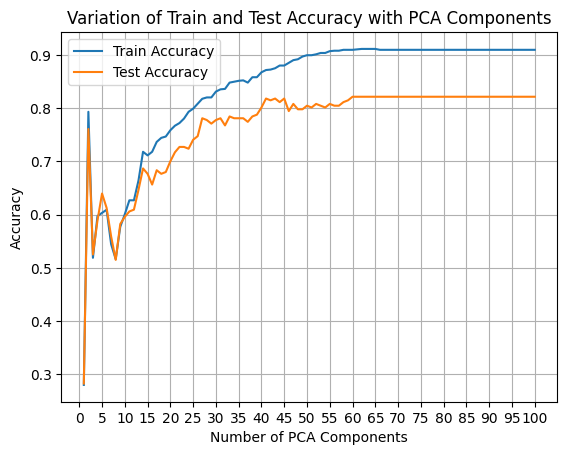

In [28]:
plt.plot(range(1, 101), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 101), test_accuracies, label='Test Accuracy')
plt.xticks(range(0, 101, 5))
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Variation of Train and Test Accuracy with PCA Components')
plt.legend()
plt.grid(True)
plt.show()

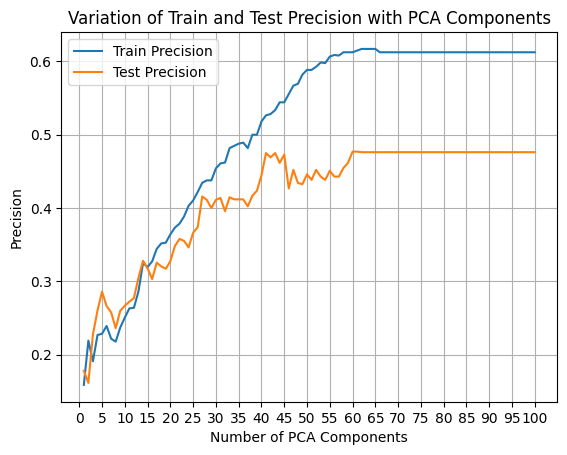

In [29]:
plt.plot(range(1, 101), train_precisions, label='Train Precision')
plt.plot(range(1, 101), test_precisions, label='Test Precision')
plt.xticks(range(0, 101, 5))
plt.xlabel('Number of PCA Components')
plt.ylabel('Precision')
plt.title('Variation of Train and Test Precision with PCA Components')
plt.legend()
plt.grid(True)
plt.show()

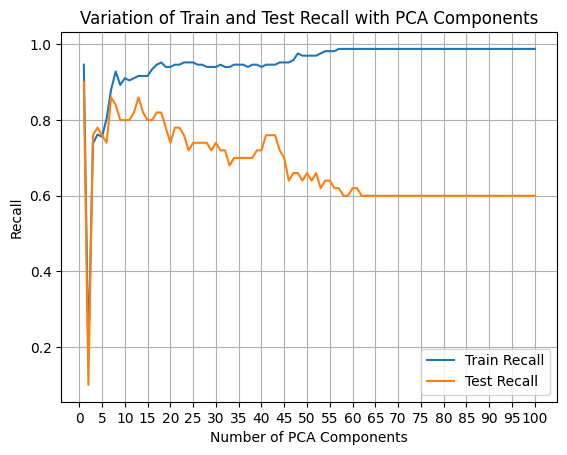

In [30]:
plt.plot(range(1, 101), train_recalls, label='Train Recall')
plt.plot(range(1, 101), test_recalls, label='Test Recall')
plt.xticks(range(0, 101, 5))
plt.xlabel('Number of PCA Components')
plt.ylabel('Recall')
plt.title('Variation of Train and Test Recall with PCA Components')
plt.legend()
plt.grid(True)
plt.show()

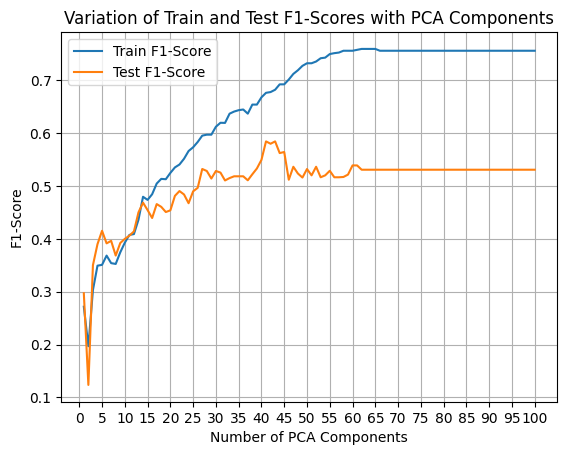

In [31]:
plt.plot(range(1, 101), train_f1s, label='Train F1-Score')
plt.plot(range(1, 101), test_f1s, label='Test F1-Score')
plt.xticks(range(0, 101, 5))
plt.xlabel('Number of PCA Components')
plt.ylabel('F1-Score')
plt.title('Variation of Train and Test F1-Scores with PCA Components')
plt.legend()
plt.grid(True)
plt.show()

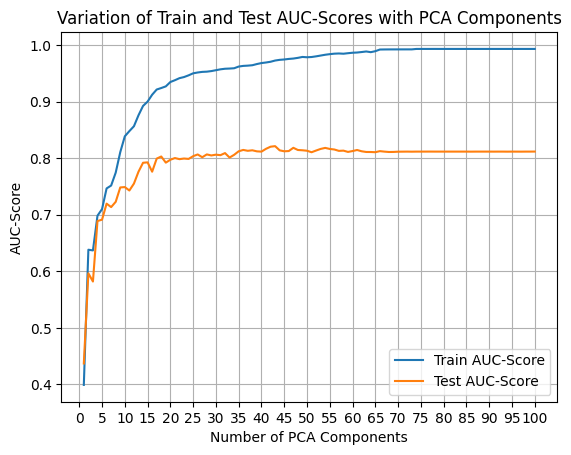

In [32]:
plt.plot(range(1, 101), train_aucs, label='Train AUC-Score')
plt.plot(range(1, 101), test_aucs, label='Test AUC-Score')
plt.xticks(range(0, 101, 5))
plt.xlabel('Number of PCA Components')
plt.ylabel('AUC-Score')
plt.title('Variation of Train and Test AUC-Scores with PCA Components')
plt.legend()
plt.grid(True)
plt.show()

# **Explained Variance Analysis**

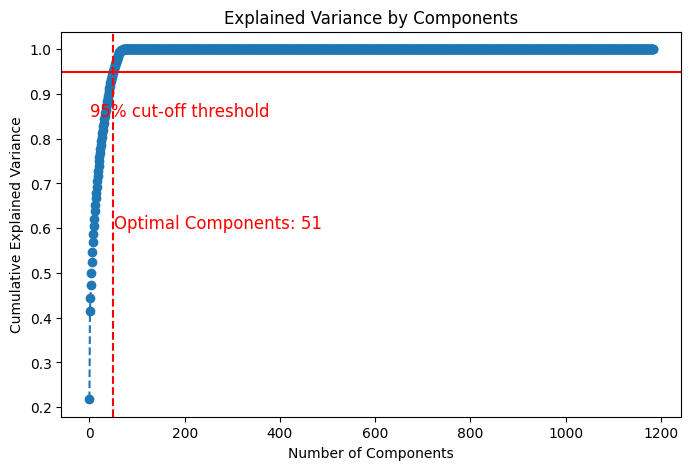

In [33]:
pca = PCA().fit(X_train)

# Calculate cumulative sum of explained variances
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components for desired explained variance, e.g., 95%
n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

# Plotting the cumulative variance against the number of components
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
plt.axvline(x=n_components-1, color='r', linestyle='--')
plt.text(n_components, 0.60, f'Optimal Components: {n_components}', color = 'red', fontsize=12)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()